In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
print(data.head()) #The data.head() function provides a quick look at the first few rows of a DataFrame.

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [4]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['State'])], remainder='passthrough')
#OneHotEncoder() - change from categorical data into numerical data if model cannot handle categorical data
data = np.array(ct.fit_transform(data))


In [5]:
X = data[:, :-1]  # All columns except the last one
y = data[:, -1]   # The last column


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict(X_test)


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [10]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 192148061.81509
R-squared: 0.9112695892268754


In [11]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


           Actual      Predicted
0     89012.02672   89790.615329
1     87654.55773   88427.071874
2     94093.35179   94894.678370
3    175396.26160  175680.867256
4     83356.61784   83411.730421
..            ...            ...
195  164779.98270  165897.619059
196  168402.17810  168655.486526
197  145976.17530  147009.668050
198  141082.79440  141396.221041
199  108917.01570  109086.506348

[200 rows x 2 columns]


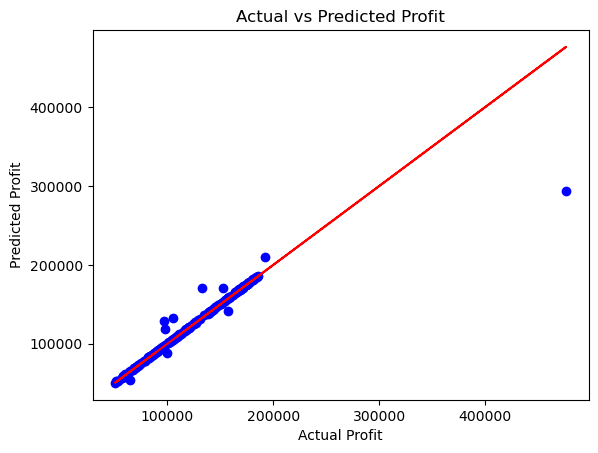

In [12]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # Line for comparison
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()